In [ ]:
!pip install vecstack

In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter #for Smote, 

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


trainfile = r'/gdrive/My Drive/CIS-508/Assignment-6/Churn-Train-1.csv'
train_data = pd.read_csv(trainfile)

testfile = r'/gdrive/My Drive/CIS-508/Assignment-6/Churn-Test-1.csv'
test_data = pd.read_csv(testfile)

print(train_data.shape)
print(train_data.head()) 

print(test_data.shape)
print(test_data.head()) 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
(1165, 21)
  State  Account Length  Area Code  ... Intl Charge CustServ Calls TARGET
0    KS             128        415  ...        2.70              1      0
1    OH             107        415  ...        3.70              1      0
2    NJ             137        415  ...        3.29              0      0
3    OH              84        408  ...        1.78              2      0
4    OK              75        415  ...        2.73              3      0

[5 rows x 21 columns]
(1261, 21)
  State  Account Length  Area Code  ... Intl Charge CustServ Calls TARGET
0    VT              50        415  ...        2.16              0      0
1    UT              72        415  ...        3.29              3      0
2    KS             130        510  ...        3.48              1      0
3    NV             143        408  ...        2.05              1      0
4    DE           

In [ ]:
train_data_Copy = train_data.iloc[:, :-1].copy()
test_data_Copy = test_data.iloc[:, :-1].copy()

train_data_Copy.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
categoricalFeatures = ["State","Int'l Plan","VMail Plan"]
combined_Data = pd.concat([train_data_Copy,test_data_Copy], keys=[0,1])
combined_Data = pd.get_dummies(combined_Data,columns=categoricalFeatures)
combined_Data = combined_Data.drop(["Phone"], axis=1)
X_train = combined_Data.xs(0)
X_test = combined_Data.xs(1)

X_test.head()
X_train.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
Y_train = train_data["TARGET"]
Y_test = test_data["TARGET"]

print(Y_test.shape)
print(Y_train.shape)

(1261,)
(1165,)


In [ ]:
print("Number of null values in train data",X_train.isnull().sum().sum())
print("Number of null values in test data",X_test.isnull().sum().sum())

Number of null values in train data 0
Number of null values in test data 0


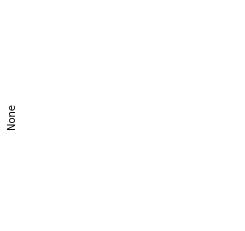

In [ ]:
missingdata = X_test.isnull().sum()
missingdata.plot.pie()

In [ ]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf_predict=clf.predict(X_test)
print("accuracy Score (testing) for Decision Tree:{0:6f}".format(clf.score(X_test,Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,clf_predict))
print(classification_report(Y_test,clf_predict))

accuracy Score (testing) for Decision Tree:0.911975
Confusion Matrix for Decision Tree
[[1023   46]
 [  65  127]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1069
           1       0.73      0.66      0.70       192

    accuracy                           0.91      1261
   macro avg       0.84      0.81      0.82      1261
weighted avg       0.91      0.91      0.91      1261



In [ ]:
#Hyperparameter tuning done for decision tree classifier
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,30,2)}
clf_random = RandomizedSearchCV(clf,parameters,n_iter=15)
clf_random.fit(X_train, Y_train)
grid_parm=clf_random.best_params_
print("=== BEST PARAMETERES===")
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
clf = DecisionTreeClassifier(**grid_parm)
clfr = DecisionTreeClassifier(**grid_parm)

clf.fit(X_train,Y_train)
clf_predict = clf.predict(X_test)
clfr.fit(X_train,Y_train)
clfr_predict = clfr.predict(X_test)


#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (testing) after hypertuning randomized search for Decision Tree:{0:6f}".format(clf.score(X_test,Y_test)))

print("accuracy Score (testing) after hypertuning grid search for Decision Tree:{0:6f}".format(clfr.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for Decision Tree")
print(confusion_matrix(Y_test,clf_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,clf_predict))

clf_cv_score = cross_val_score(clf, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(clf_cv_score)
print('\n')


=== BEST PARAMETERES===
{'min_samples_split': 20, 'max_depth': 7}
accuracy Score (testing) after hypertuning randomized search for Decision Tree:0.927042
accuracy Score (testing) after hypertuning grid search for Decision Tree:0.927042
Confusion Matrix after hypertuning for Decision Tree
[[1057   12]
 [  80  112]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1069
           1       0.90      0.58      0.71       192

    accuracy                           0.93      1261
   macro avg       0.92      0.79      0.83      1261
weighted avg       0.93      0.93      0.92      1261

[0.61862745 0.84705882 0.8372549  0.71862745 0.74705882 0.72352941
 0.83263305 0.75630252 0.7254902  0.73019802]




In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_predict=rfc.predict(X_test)
print("accuracy Score (testing) for RandomForest:{0:6f}".format(rfc.score(X_test,Y_test)))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Y_test,rfc_predict))
print(classification_report(Y_test,rfc_predict))

accuracy Score (testing) for RandomForest:0.882633
Confusion Matrix for Random Forest:
[[1062    7]
 [ 141   51]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1069
           1       0.88      0.27      0.41       192

    accuracy                           0.88      1261
   macro avg       0.88      0.63      0.67      1261
weighted avg       0.88      0.88      0.85      1261



In [ ]:
#Hyperparameter tuning for random forest
parameters={ 'n_estimators': range(50,150,20),'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=15)
rfc_random.fit(X_train, Y_train)
grid_parm_rfc=rfc_random.best_params_
print("=== BEST PARAMETERS ===")
print(grid_parm_rfc)

#contruct random forest using the best parameters
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(X_train,Y_train)
rfc_predict = rfc.predict(X_test)
print("accuracy Score (testing) after hypertuning for Random Forest:{0:6f}".format(rfc.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(Y_test,rfc_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,rfc_predict))
rfc_cv_score = cross_val_score(rfc, X_train, Y_train)
print(rfc_cv_score)
print('\n')


=== BEST PARAMETERS ===
{'n_estimators': 90, 'min_samples_split': 10, 'max_depth': 19}
accuracy Score (testing) after hypertuning for Random Forest:0.904044
Confusion Matrix after hypertuning for Random Forest:
[[1068    1]
 [ 120   72]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1069
           1       0.99      0.38      0.54       192

    accuracy                           0.90      1261
   macro avg       0.94      0.69      0.74      1261
weighted avg       0.91      0.90      0.89      1261

[0.92544987 0.89974293 0.92764858]




In [ ]:
# Linear SVM DEFAULT MODE --------
lin_clf = LinearSVC()
lin_clf.fit(X_train, Y_train)
lin_clf_predict=lin_clf.predict(X_test)
print("accuracy Score (testing) for SVMLinear:{0:6f}".format(lin_clf.score(X_test,Y_test)))
print("Confusion Matrix for SVMLinear:")
print(confusion_matrix(Y_test,lin_clf_predict))
print(classification_report(Y_test,lin_clf_predict))

accuracy Score (testing) for SVMLinear:0.848533
Confusion Matrix for SVMLinear:
[[1069    0]
 [ 191    1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1069
           1       1.00      0.01      0.01       192

    accuracy                           0.85      1261
   macro avg       0.92      0.50      0.46      1261
weighted avg       0.87      0.85      0.78      1261



In [ ]:
#Linear SVM AFTER HYPERPARAMETER TUNING
parameters={'max_iter' : range(50,150,20)}
svm_random = RandomizedSearchCV(lin_clf,parameters)
svm_random.fit(X_train, Y_train)
grid_parm_svm=svm_random.best_params_
print("=== BEST PARAMETERS ===")
print(grid_parm_svm)

#contruct linear SVM using the best parameters
lin_clf= LinearSVC(**grid_parm_svm)
lin_clf.fit(X_train,Y_train)
lin_clf_predict = lin_clf.predict(X_test)
print("accuracy Score (testing) after hypertuning for SVM:{0:6f}".format(lin_clf.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for svm:")
print(confusion_matrix(Y_test,lin_clf_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,lin_clf_predict))
lin_clf_cv_score = cross_val_score(lin_clf, X_train, Y_train)
print(lin_clf_cv_score)
print('\n')


=== BEST PARAMETERS ===
{'max_iter': 110}
accuracy Score (testing) after hypertuning for SVM:0.847740
Confusion Matrix after hypertuning for svm:
[[1069    0]
 [ 192    0]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1069
           1       0.00      0.00      0.00       192

    accuracy                           0.85      1261
   macro avg       0.42      0.50      0.46      1261
weighted avg       0.72      0.85      0.78      1261

[0.87403599 0.87403599 0.87596899]




In [ ]:
# MLP DEFAULT MODE-------
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
mlp_predict=mlp.predict(X_test)
print("accuracy Score (testing) for mlp:{0:6f}".format(mlp.score(X_test,Y_test)))
print("Confusion Matrix for mlp:")
print(confusion_matrix(Y_test,mlp_predict))
print(classification_report(Y_test,mlp_predict))

accuracy Score (testing) for mlp:0.842189
Confusion Matrix for mlp:
[[979  90]
 [109  83]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1069
           1       0.48      0.43      0.45       192

    accuracy                           0.84      1261
   macro avg       0.69      0.67      0.68      1261
weighted avg       0.84      0.84      0.84      1261



In [ ]:
parameters={'hidden_layer_sizes' :range(10,150,10)}
mlp_random = RandomizedSearchCV(mlp,parameters)
mlp_random.fit(X_train, Y_train)
grid_parm_mlp=mlp_random.best_params_
print("=== BEST PARAMETERS ===")
print(grid_parm_mlp)

#contruct linear SVM using the best parameters
mlp_clf= MLPClassifier(**grid_parm_svm)
mlp_clf.fit(X_train,Y_train)
mlp_clf_predict = mlp_clf.predict(X_test)
print("accuracy Score (testing) after hypertuning for mlp:{0:6f}".format(mlp_clf.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for mlp:")
print(confusion_matrix(Y_test,mlp_clf_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,mlp_clf_predict))
mlp_clf_cv_score = cross_val_score(mlp_clf, X_train, Y_train)
print(mlp_clf_cv_score)
print('\n')


=== BEST PARAMETERS ===
{'hidden_layer_sizes': 100}
accuracy Score (testing) after hypertuning for mlp:0.850912
Confusion Matrix after hypertuning for mlp:
[[1040   29]
 [ 159   33]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1069
           1       0.53      0.17      0.26       192

    accuracy                           0.85      1261
   macro avg       0.70      0.57      0.59      1261
weighted avg       0.82      0.85      0.82      1261

[0.8714653  0.87403599 0.87080103]




In [ ]:
#SMOTE==============================================================================
print("___________________________________________________________________\nSMOTE\n")
print('Original dataset shape %s' % Counter(Y_train))
sm = SMOTE(sampling_strategy='float', ratio=0.5)
X_res, Y_res = sm.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(Y_res))


___________________________________________________________________
SMOTE

Original dataset shape Counter({0: 1019, 1: 146})
Resampled dataset shape Counter({0: 1019, 1: 509})


In [ ]:
#STACKING MODELS =====================================================================
print("___________________________________________________________________________________________\nEnsemble Methods Predictions using support vector, RandomForest and Decision Tree Classifier\n")

models = [ LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier() ]
      
S_Train, S_Test = stacking(models,                   
                           X_res, Y_res, X_test,  
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)


___________________________________________________________________________________________
Ensemble Methods Predictions using support vector, RandomForest and Decision Tree Classifier

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearSVC]
    fold  0:  [0.72323760]
    fold  1:  [0.68586387]
    fold  2:  [0.67277487]
    fold  3:  [0.55643045]
    ----
    MEAN:     [0.65957670] + [0.06236399]
    FULL:     [0.65968586]

model  1:     [RandomForestClassifier]
    fold  0:  [0.92950392]
    fold  1:  [0.93455497]
    fold  2:  [0.91099476]
    fold  3:  [0.93175853]
    ----
    MEAN:     [0.92670305] + [0.00924399]
    FULL:     [0.92670157]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.92689295]
    fold  1:  [0.90575916]
    fold  2:  [0.91884817]
    fold  3:  [0.92388451]
    ----
    MEAN:     [0.91884620] + [0.00808402]
    FULL:     [0.91884817]



In [ ]:
#STACKING - CONTRUCT A randomforest==============================
model = RandomForestClassifier()
    
model = model.fit(S_Train, Y_res)
y_pred = model.predict(S_Test)
print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(Y_test, y_pred))
print("Confusion Matrix after STACKING for randomforest:")
print(confusion_matrix(Y_test,y_pred))
print("=== Classification Report ===")
print(classification_report(Y_test,y_pred))



Final prediction score for ensemble methods: [0.91990484]
Confusion Matrix after STACKING for randomforest:
[[1039   30]
 [  71  121]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1069
           1       0.80      0.63      0.71       192

    accuracy                           0.92      1261
   macro avg       0.87      0.80      0.83      1261
weighted avg       0.92      0.92      0.92      1261

